## Tensorflow实现单变量线性回归
#### 假设我们要学习的函数为线性函数 y = 2x +1
### 生成数据

In [1]:
# 在Jupyter中，使用matplotlib显示图像需要设置为 inline 模式，否则不会现实图像
%matplotlib inline

import matplotlib.pyplot as plt #载入matplotlib
import numpy as np #载入numpy

import tensorflow as tf #载入Tensorflow 

# 设置随机数种子
np.random.seed(5)

### 首先，生成输入数据。
我们需要构造满足这个函数的x和y同时加入一些不满足方程的噪声。

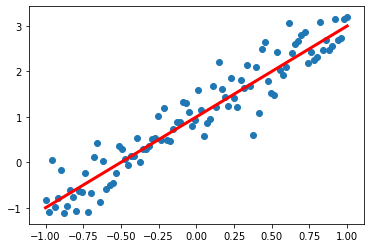

In [2]:
# 直接采用np生成等差数列的方法，生成100个点，每个点的取值在-1~1之间
x_data = np.linspace(-1, 1, 100)

# y = 2x +1 + 噪声， 其中， 噪声的唯度与x_data一致
y_data = 2 * x_data + 1.0 + np.random.randn( * x_data.shape) * 0.4

# 画出随机生成数据的散点图
plt.scatter(x_data, y_data)

# 画出通过学习得到的目标线性函数 y = 2x + 1
plt.plot(x_data, 2 * x_data + 1.0, color = 'red', linewidth = 3)

## 构建模型
### 定义x和y的占位符

In [3]:
# 定义训练数据的占位符，x是特征，y是标签值

x = tf.placeholder("float", name = "x")
y = tf.placeholder("float", name = "y")

### 构建回归模型

In [4]:
def model(x, w, b):
    return tf.multiply(x, w) + b

### 创建变量
    ● Tensorflow变量的声明函数是tf.Variable
    ● tf.Variable的作用是保存和更新参数
    ● 变量的初始值可以是随机数、常数，或是通过其他变量的初始值计算得到

In [5]:
# 构建线性函数的斜率，变量w
w = tf.Variable(1.0, name = "w0")

# 构建线性函数的截距，变量b
b = tf.Variable(0.0, name = "b0")

In [6]:
# pred是预测值，前向计算
pred = model(x, w, b)

## 训练模型
### 设置训练参数

In [7]:
# 迭代次数（训练轮数）
train_epochs = 10

# 学习率
learning_rate = 0.05

# 控制显示loss值的粒度
display_step = 10

### 关于学习率（learning_rate）的设置
    ● 学习率的作用：控制参数更新的幅度。
    ● 如果学习率设置过大，可能导致参数在极值附过来回摇摆，无法保证收敛。
    ● 如果学习率设置过小，虽然能保证收敛，但优化速度会大大降低，我们需要更多迭代次数才能达到较理想的优化效果
### 定义损失函数
    ● 损失函数用于描述预测值与真实值之间的误差，从而指导模型收敛方向
    ● 常见损失函数：均方差（Mean Square Error，MSE）和交叉熵（cross-entropy）

In [8]:
# 采用均方差作为损失函数
loss_function = tf.reduce_mean(tf.square(y-pred))

### 选择优化器

In [9]:
# 梯度下降优化器
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)

### 声明会话

In [10]:
sess = tf.Session()

### 变量初始化
    ● 在真正执行计算之前，需将所有变量初始化
    ● 通过tf.global_variables_initializer 函数可实现对所有变量的初始化

In [11]:
init = tf.global_variables_initializer()
sess.run(init)

### 执行训练

Train Epoch:01 step:010 loss=0.007021904
Train Epoch:01 step:020 loss=0.186607897
Train Epoch:01 step:030 loss=0.024833022
Train Epoch:01 step:040 loss=0.620799541
Train Epoch:01 step:050 loss=0.006301077
Train Epoch:01 step:060 loss=0.023637433
Train Epoch:01 step:070 loss=0.354419798
Train Epoch:01 step:080 loss=0.027936857
Train Epoch:01 step:090 loss=0.029015331
Train Epoch:01 step:100 loss=0.106556907
Train Epoch:02 step:110 loss=0.179423183
Train Epoch:02 step:120 loss=0.067458346
Train Epoch:02 step:130 loss=0.000281519
Train Epoch:02 step:140 loss=0.344065875
Train Epoch:02 step:150 loss=0.021391280
Train Epoch:02 step:160 loss=0.006406436
Train Epoch:02 step:170 loss=0.142010629
Train Epoch:02 step:180 loss=0.000233675
Train Epoch:02 step:190 loss=0.094913408
Train Epoch:02 step:200 loss=0.052370854
Train Epoch:03 step:210 loss=0.044097763
Train Epoch:03 step:220 loss=0.082669340
Train Epoch:03 step:230 loss=0.000454877
Train Epoch:03 step:240 loss=0.327929199
Train Epoch:03 s

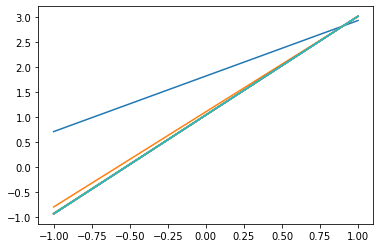

In [12]:
# 开始训练，轮数为epoch，采用SGD随机梯度下降优化方法
step = 0 #记录步数
loss_list = [] # 用于保存loss值的列表

for epoch in range(train_epochs):
    for xs,ys in zip(x_data, y_data):
        _, loss = sess.run([optimizer, loss_function], feed_dict = {x:xs, y:ys})
        
        #显示损失值loss
        #display_step:控制报告的粒度
        #例如，如果display_step 设为 2 ,则将每训练2个样本输出一次损失值
        #与超参数不同，修改display_step 不会更改模型所学习的规律
        loss_list.append(loss)
        step = step + 1
        if step % display_step == 0:
            print("Train Epoch:%02d"%(epoch + 1), "step:%03d"%(step), "loss={:.9f}".format(loss))
            
    b0temp = b.eval(session = sess)
    w0temp = w.eval(session = sess)
    plt.plot(x_data, w0temp * x_data + b0temp) #画图

#### 从上图可以看出，由于本案例所拟合的模型较简单，训练3次这后已经接近收敛。 
对于复杂模型，需要更多次训练才能收敛。

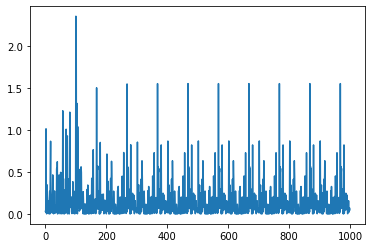

In [13]:
plt.plot(loss_list)

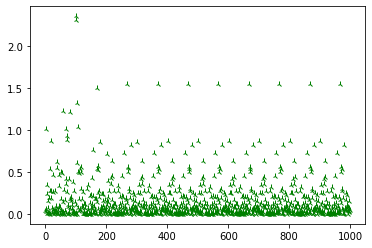

In [14]:
plt.plot(loss_list,'g2')

In [15]:
[x for x in loss_list if x>1]

[1.0133754,
 1.2284044,
 1.0088208,
 1.2116321,
 2.3539772,
 2.3148305,
 1.3175836,
 1.0387748,
 1.5018207,
 1.547514,
 1.5514,
 1.5517284,
 1.5517554,
 1.551758,
 1.551758,
 1.551758,
 1.551758]

### 打印结果

In [16]:
print("w:", sess.run(w)) # W的值应该在2附过
print("b:", sess.run(b)) # b的值应该在1附过

w: 1.9822965
b: 1.0420128


### 可视化

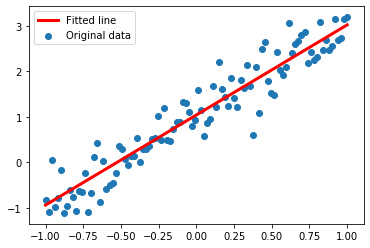

In [17]:
plt.scatter(x_data, y_data, label = 'Original data')
plt.plot(x_data, x_data * sess.run(w) + sess.run(b), label = 'Fitted line', color = 'r', linewidth = 3)
plt.legend(loc = 2) # 通过参数loc指定图例位置

## 进行预测

In [18]:
x_test = 3.21
predict = sess.run(pred, feed_dict={x: x_test})
print("预测值:%f" % predict)

target = 2 * x_test + 1.0
print("目标值:%f" % target)

预测值:7.405184
目标值:7.420000


In [19]:
predict = sess.run(w) * x_test + sess.run(b)
print("预测值:%f" % predict)

target = 2 * x_test + 1.0
print("目标值:%f" % target)

预测值:7.405184
目标值:7.420000
